In [1]:
!nvidia-smi

Sat Jun 28 16:53:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [7]:
# Git clone method (for development)

import os
HOME = os.getcwd()

# Clone the Ultralytics repository
%cd {HOME}
!git clone https://github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics

# Install the package in editable mode
!pip install -e .


/content
Cloning into 'ultralytics'...
remote: Enumerating objects: 62581, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 62581 (delta 166), reused 80 (delta 80), pack-reused 62348 (from 3)
Receiving objects: 100% (62581/62581), 33.64 MiB | 28.78 MiB/s, done.
Resolving deltas: 100% (46594/46594), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.160-0.editable-py3-none-any.whl size=23090 sha256=bb88b8302361295c93bebcd20d2899d55a54e57f0ac3ad9bfe6c58722425cc0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0gf0dv9q/wheels/ea/71/6b/a9012dfb148489fd8125c2310e565414c996b3c7721defe

In [6]:
!unrar x "/content/ultralytics/ultralytics/nn/yolo_cam.rar" "/content/ultralytics/ultralytics/nn"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/ultralytics/ultralytics/nn/yolo_cam.rar

Creating    /content/ultralytics/ultralytics/nn/yolo_cam              OK
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/activations_and_gradients.py       9%  OK 
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/base_cam.py      41%  OK 
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/eigen_cam.py      47%  OK 
Creating    /content/ultralytics/ultralytics/nn/yolo_cam/utils        OK
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/utils/image.py      80%  OK 
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/utils/model_targets.py      92%  OK 
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/utils/svd_on_activations.py      98%  OK 
Extracting  /content/ultralytics/ultralytics/nn/yolo_cam/__init__.py      99%  OK 
All OK


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="mZIPBax8HfLFLrAlPIiw")
project = rf.workspace("aitech-a6cge").project("cpe-dataset")
version = project.version(16)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CPE-Dataset-16 in yolov8:: 100%|██████████| 7003/7003 [00:00<00:00, 8763.15it/s]


## Custom Training

In [12]:
!mv /content/ultralytics/ultralytics/nn/yolo_cam /content/ultralytics/ultralytics/nn/modules/

In [21]:
!pip install ttach

# Verify installation
import ttach

In [15]:


!yolo task=detect mode=train model=/content/ultralytics/ultralytics/cfg/models/v8/yolov8n-ghost1.yaml data=/content/datasets/CPE-Dataset-16/data.yaml optimizer=SGD imgsz=640 epochs=10 batch=8

Streaming output truncated to the last 5000 lines.
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       5/10      1.36G      1.432      2.112       2.41         10        640:   5% 19/416 [00:04<01:21,  4.84it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:92.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       5/10      1.36G      1.446      2.121      2.431          9        640:   5% 20/416 [00:04<01:19,  4.97it/s]/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserW

In [16]:
!ls /content/runs/detect/train2

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


## Validate Custom Model

In [17]:


!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/datasets/CPE-Dataset-16/data.yaml  optimizer=SGD imgsz=640

Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-ghost1 summary (fused): 176 layers, 3,876,974 parameters, 0 gradients, 9.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 581.8±182.1 MB/s, size: 15.7 KB)
val: Scanning /content/datasets/CPE-Dataset-16/valid/labels.cache... 174 images, 4 backgrounds, 0 corrupt: 100% 174/174 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  3.24it/s]
                   all        174        200      0.403      0.691      0.553      0.389
                   APE         60         72      0.406      0.431      0.436      0.287
                   BPE         31         38      0.404      0.553      0.444      0.288
                    NE         32         32      0.493      0.851      0.804      0.667
                   VPE         53         58      0.309      0.931      0.528      0.314
Speed: 1.0ms preprocess, 7.7ms infer

## Inference with Custom Model

In [18]:

!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/datasets/CPE-Dataset-16/valid/images save=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics 8.3.160 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-ghost1 summary (fused): 176 layers, 3,876,974 parameters, 0 gradients, 9.0 GFLOPs

image 1/174 /content/datasets/CPE-Dataset-16/valid/images/1-Copy-Copy-Copy_jpg.rf.34d4ed872aceb1e9fdd7f77b9522bbab.jpg: 640x640 1 APE, 1 BPE, 1 VPE, 15.9ms
image 2/174 /content/datasets/CPE-Dataset-16/valid/images/100_jpg.rf.d220165e74ce0ab421cbb6f0c34d28e1.jpg: 640x640 (no detections), 16.1ms
image 3/174 /content/datasets/CPE-Dataset-16/valid/images/106_jpeg_jpg.rf.335d12ac7972c7610a4bc7dcb3fa2552.jpg: 640x640 1 VPE, 13.7ms
image 4/174 /content/datasets/CPE-Dataset-16/valid/images/115_jpg.rf.12709be353f57eb15c8db3fbadee1e78.jpg: 640x640 1 NE, 13.5ms
image 5/174 /content/datasets/CPE-Dataset-16/valid/images/117_jpg.rf.98a995ef62f15e41a9e68b50ba699424.jpg: 640x640 1 VPE, 13.5ms
image 6/174 /content/datasets/CPE-Dataset-16/valid/images/117_jpg.rf.cb439bfa4dc961a3

**NOTE:** Let's take a look at few results.

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [4]:
import os
import shutil
from google.colab import files

# Define the folder to compress and the output ZIP file path
folder_to_zip = "/content/ultralytics"
output_zip = "/content/ultralytics1.zip"

# Create a ZIP archive of the ultralytics folder
try:
    shutil.make_archive(output_zip.replace(".zip", ""), "zip", folder_to_zip)
    print(f"Created ZIP file: {output_zip}")
except Exception as e:
    print(f"Error creating ZIP file: {e}")
    raise

# Download the ZIP file
if os.path.exists(output_zip):
    files.download(output_zip)
    print("Downloading ultralytics.zip...")
else:
    print(f"ZIP file {output_zip} not found.")

Created ZIP file: /content/ultralytics1.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import sys
sys.path.insert(0, "/content/ultralytics")  # Use custom ultralytics directory
import cv2
import numpy as np
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

# Load the trained model
model_path = "/content/runs/detect/train2/weights/best.pt"  # Adjust path to your trained model
try:
    model = YOLO(model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    raise


Model loaded successfully!


Activation tensors: [torch.Size([1, 64, 80, 80]), torch.Size([1, 128, 40, 40]), torch.Size([1, 384, 20, 20])]
Heatmap shape: torch.Size([80, 80])


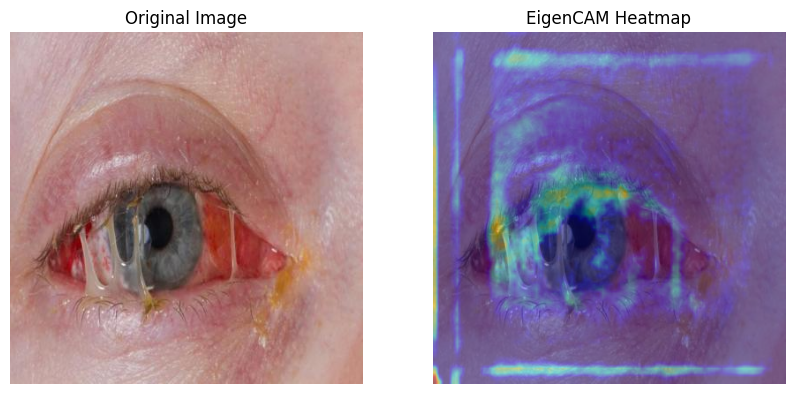

Saved eigencam_heatmap.jpg and eigencam_overlay.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:

# Load an input image
image_path = "/content/datasets/CPE-Dataset-16/valid/images/1-Copy-Copy-Copy_jpg.rf.34d4ed872aceb1e9fdd7f77b9522bbab.jpg"  # Replace with your test image path
if not os.path.exists(image_path):
    print(f"Image {image_path} not found. Please upload an image.")
    files.upload()  # Upload an image via Colab
    image_path = list(files.upload().keys())[0] if files.upload() else None

# Manual preprocessing
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (640, 640))  # YOLOv8 default input size
img_tensor = torch.from_numpy(img_resized).permute(2, 0, 1).float() / 255.0  # Normalize, CHW
img_tensor = img_tensor.unsqueeze(0).to(model.device)  # BCHW

# Register forward hook to capture activations
activations = {}
def get_activation(name):
    def hook(module, input, output):
        activations[name] = output
    return hook

# Target layers (adjust based on yolov8-Ghost.yaml)
target_layer_indices = [16, 19, 22]  # Use [22] if single input
for idx in target_layer_indices:
    try:
        model.model.model[idx].register_forward_hook(get_activation(f"layer_{idx}"))
    except IndexError:
        print(f"Layer index {idx} not found in model. Check model architecture.")
        print(model.model)
        raise

# Perform inference
model.model.eval()
with torch.no_grad():
    _ = model.model(img_tensor)  # Run forward pass to capture activations

    # Create EigenCAM instance
    from ultralytics.nn.modules.yolo_cam.eigen_cam import EigenCAM
    try:
        eigencam_module = EigenCAM(model=model.model, target_layers=[model.model.model[idx] for idx in target_layer_indices])
    except Exception as e:
        print(f"Error creating EigenCAM instance: {e}")
        raise

    # Get activations
    activation_tensors = [activations[f"layer_{idx}"] for idx in target_layer_indices]
    print(f"Activation tensors: {[t.shape for t in activation_tensors]}")

    # Apply EigenCAM
    try:
        heatmap = eigencam_module(activation_tensors, targets=None, eigen_smooth=False)
        print(f"Heatmap shape: {heatmap.shape}")
    except Exception as e:
        print(f"Error in EigenCAM forward: {e}")
        raise

# Process the heatmap
heatmap = heatmap.squeeze().cpu().numpy()  # Remove batch dimension
if heatmap.ndim > 2:
    heatmap = heatmap.mean(axis=0)  # Average across channels if multi-channel
heatmap = np.maximum(heatmap, 0)  # ReLU
heatmap = heatmap / np.max(heatmap) if np.max(heatmap) != 0 else heatmap  # Normalize

# Resize heatmap to match input image size
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Create a colored heatmap
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)

# Overlay heatmap on original image
alpha = 0.4  # Transparency factor
overlay = img_rgb.copy()
overlay = cv2.addWeighted(overlay, 1 - alpha, heatmap_colored, alpha, 0)

# Visualize the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("EigenCAM Heatmap")
plt.imshow(overlay)
plt.axis("off")
plt.show()

# Save the heatmap and overlay
cv2.imwrite("/content/eigencam_heatmap.jpg", cv2.cvtColor(heatmap_colored, cv2.COLOR_RGB2BGR))
cv2.imwrite("/content/eigencam_overlay.jpg", cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))
print("Saved eigencam_heatmap.jpg and eigencam_overlay.jpg")

# Download the results
files.download("/content/eigencam_heatmap.jpg")
files.download("/content/eigencam_overlay.jpg")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._